In [ ]:
### ZONGLIN LI
### 1004910117

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/INF2178")


Mounted at /content/drive


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat

In [28]:
df = pd.read_excel('INF2178_A2_data.xlsx')

In [ ]:
# observe data
df.describe()

,_id,LOC_ID,ward,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,532.000000,8087.888053,12.511759,3.896519,11.600188,24.258702,14.257761,21.661336,75.674506
std,307.005972,5151.252693,7.032050,6.091782,12.088152,18.577416,20.493290,30.423503,47.816518
min,1.000000,1013.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,266.500000,1862.000000,6.000000,0.000000,0.000000,16.000000,0.000000,0.000000,43.000000
50%,532.000000,8826.000000,12.000000,0.000000,10.000000,24.000000,0.000000,0.000000,62.000000
75%,797.500000,13245.000000,19.000000,10.000000,15.000000,32.000000,26.000000,30.000000,97.000000
max,1063.000000,14504.000000,25.000000,30.000000,90.000000,144.000000,130.000000,285.000000,402.000000


In [ ]:
#show first 5 row of df
df.head(10)

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y
5,6,1021,Centennial College Progress Campus Child Care ...,Non Profit Agency,941 PROGRESS AVE,M1G 3T8,24,Community College/University,Centennial College Of Applied Arts & Technology,10,20,32,0,0,62,Y,Y
6,7,1029,Air-O-Down Child Care Centre,Non Profit Agency,7 HAWKSDALE RD,M3K 1W3,6,Public High School,Downsview Secondary School,10,15,24,0,0,49,Y,Y
7,8,1031,Cedarbrae Day Nurseries (20 Greencrest),Commercial Agency,20 GREENCREST CIRCT,M1G 1B8,24,High Rise Apartment,Greencrest Property,0,0,16,0,30,46,Y,Y
8,9,1037,Tiago Avenue Community Child Care,Non Profit Agency,145 TIAGO AVE,M4B 2A6,19,Public Elementary School,Victoria Park Public School,0,0,21,0,30,51,Y,Y
9,10,1041,Ledbury Park Child Care Program,Non Profit Agency,95 FALKIRK ST,M5M 4K1,8,Public Elementary School,Ledbury Park Public School,0,0,24,39,90,153,Y,Y


In [ ]:
#observe df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _id          1063 non-null   int64 
 1   LOC_ID       1063 non-null   int64 
 2   LOC_NAME     1063 non-null   object
 3   AUSPICE      1063 non-null   object
 4   ADDRESS      1063 non-null   object
 5   PCODE        1063 non-null   object
 6   ward         1063 non-null   int64 
 7   bldg_type    1063 non-null   object
 8   BLDGNAME     715 non-null    object
 9   IGSPACE      1063 non-null   int64 
 10  TGSPACE      1063 non-null   int64 
 11  PGSPACE      1063 non-null   int64 
 12  KGSPACE      1063 non-null   int64 
 13  SGSPACE      1063 non-null   int64 
 14  TOTSPACE     1063 non-null   int64 
 15  subsidy      1063 non-null   object
 16  cwelcc_flag  1063 non-null   object
dtypes: int64(9), object(8)
memory usage: 141.3+ KB


In [29]:
# defined a function to reclassification of 30 building types according to relevance
def assign_building_category(building_type):
    school_types = ["Public Elementary School", "Catholic Elementary School", "Public High School",
                    "Catholic High School", "Private Elementary School"]
    residential_types = ["High Rise Apartment", "Low Rise Apartment", "House"]
    community_types = ["Community College/University", "Community/Recreation Centre", "Community/Rec Centre - City",
                       "Community/Rec Centre - Private", "Community/Rec Centre - Board Run"]
    commercial_types = ["Office Building", "Commercial Building", "Industrial Building", "Multi Human Services Facility"]
    health_types = ["Hospital/Health Centre", "Community Health Centre"]
    other_types = ["Other", "Place of Worship", "Purpose Built", "Synagogue"]

    if building_type in school_types:
        return "School"
    elif building_type in residential_types:
        return "Residential"
    elif building_type in community_types:
        return "Community Centre"
    elif building_type in commercial_types:
        return "Commercial"
    elif building_type in health_types:
        return "Health Centre"
    elif building_type in other_types:
        return "Other"
    else:
        return "Miscellaneous"

# Apply the function to df
df['bldg_type_grouped'] = df['bldg_type'].apply(assign_building_category)




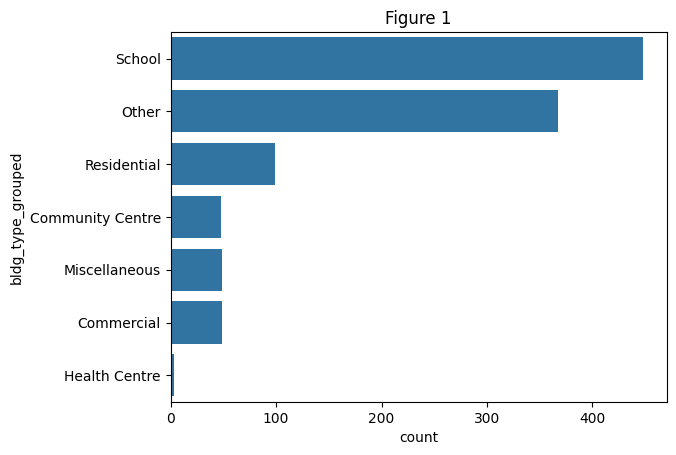

In [ ]:
# barplot for count of each building type
sns.countplot(y='bldg_type_grouped', data=df)
plt.title('Figure 1')
plt.show()

In [30]:
# create df_selected that only contain 'IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE', 'TOTSPACE', 'ward', 'subsidy', 'AUSPICE', 'bldg_type_grouped'
selected_column = ['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE', 'TOTSPACE', 'ward', 'subsidy', 'AUSPICE', 'bldg_type_grouped']
df_selected = df[selected_column]

In [ ]:
# show new df first 5 rows
df_selected.head(5)

,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,ward,subsidy,AUSPICE,bldg_type_grouped
0,0,20,32,52,60,164,3,Y,Non Profit Agency,School
1,0,0,12,26,45,83,8,Y,Non Profit Agency,School
2,0,10,16,26,50,102,25,Y,Non Profit Agency,School
3,10,15,40,0,0,65,10,Y,Non Profit Agency,Other
4,0,10,16,0,0,26,20,Y,Non Profit Agency,Residential


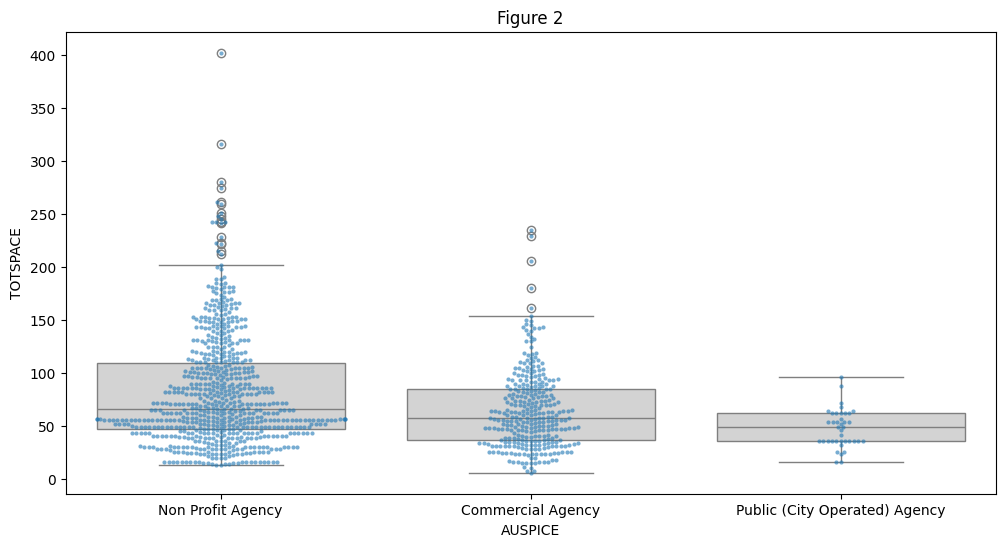

In [ ]:
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can
# easily detect the differences between different treatments
plt.figure(figsize=(12, 6))
sns.boxplot(x='AUSPICE', y='TOTSPACE', data=df_selected, color='lightgrey')
sns.swarmplot(x='AUSPICE', y='TOTSPACE', data=df_selected, size=3, alpha=0.6)
plt.title('Figure 2')
plt.show()

In [33]:

# Ordinary Least Squares (OLS) model

model = ols('TOTSPACE ~ C(AUSPICE)', data=df_selected).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# ANOVA table
res = stat()
res.anova_stat(df=df_selected, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,9.611211e+04,48056.057145,21.843051,5.057716e-10
Residual,1060.0,2.332065e+06,2200.061571,NaN,NaN


In [34]:
#post hoc test using  Tukey's HSD for auspice
res = stat()
res.tukey_hsd(df=df_selected, res_var='TOTSPACE', xfac_var='AUSPICE', anova_model='TOTSPACE ~ C(AUSPICE)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,17.119417,9.703599,24.535235,7.662434,0.001000
1,Non Profit Agency,Public (City Operated) Agency,34.334610,16.224077,52.445142,6.292710,0.001000
2,Commercial Agency,Public (City Operated) Agency,17.215193,-1.453146,35.883531,3.060857,0.077966


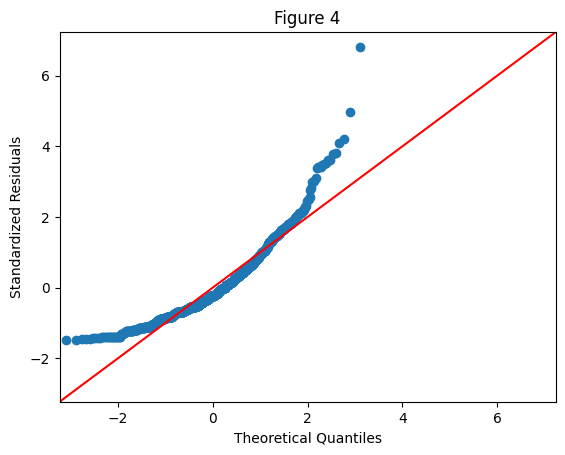

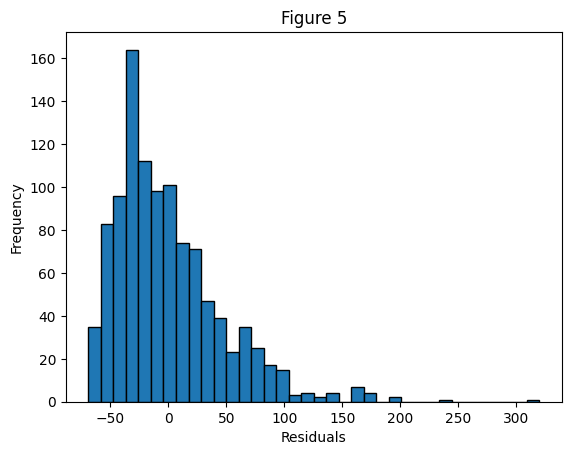

In [35]:
#checking model diagnostics
import statsmodels.api as sm
import matplotlib.pyplot as plt

# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.title('Figure 4')
plt.show()

# histogram of residual
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.title('Figure 5')
plt.show()

# Two way ANOVA

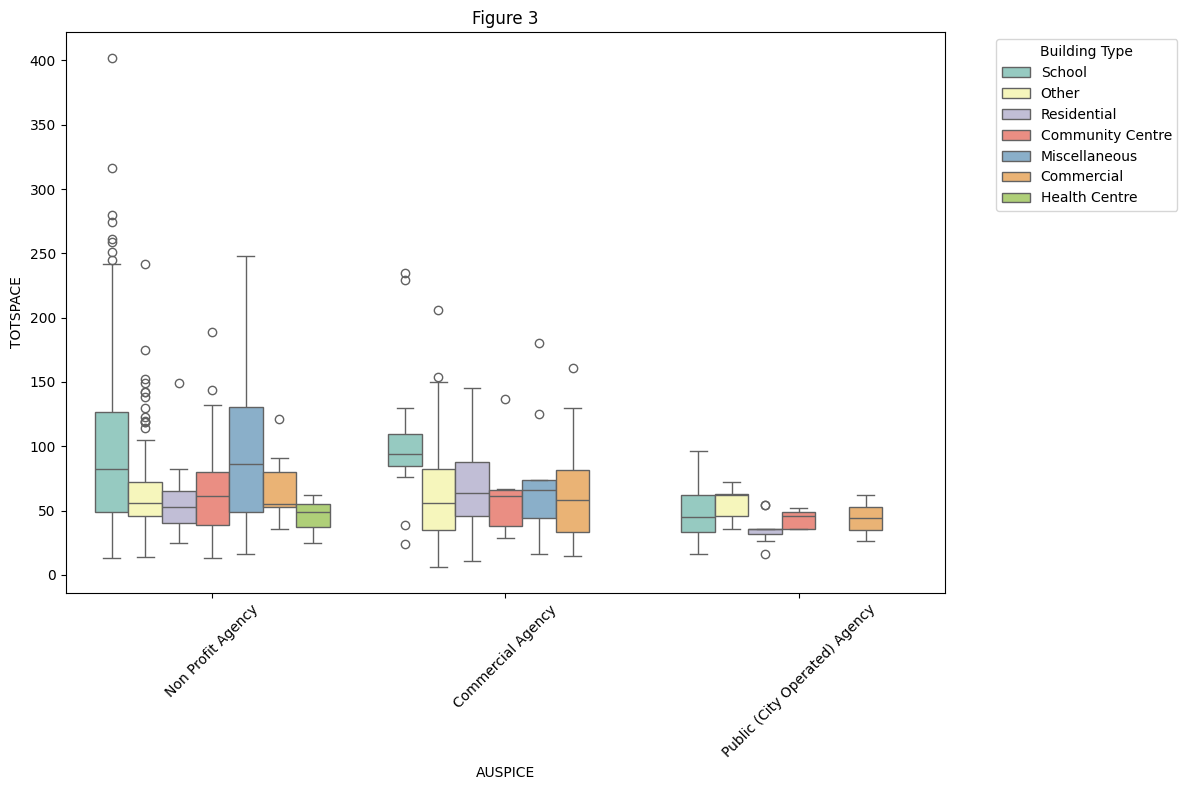

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="AUSPICE", y="TOTSPACE", hue='bldg_type_grouped', data=df_selected, palette="Set3")
plt.xticks(rotation=45)
plt.legend(title='Building Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend out of the plot
plt.title('Figure 3')
plt.tight_layout()
plt.show()


In [ ]:

# Ordinary Least Squares (OLS) model
model = ols('TOTSPACE ~ C(AUSPICE) + C(bldg_type_grouped) + C(AUSPICE):C(bldg_type_grouped)', data=df_selected).fit()
# Create two-way ANOVA Table
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 10
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(AUSPICE),1.681711e+04,2.0,4.092422,1.696711e-02
C(bldg_type_grouped),3.142589e+05,6.0,25.491505,6.419928e-16
C(AUSPICE):C(bldg_type_grouped),1.959128e+04,12.0,0.794585,6.341068e-01
Residual,2.147124e+06,1045.0,NaN,NaN


In [ ]:
#post hoc test using  Tukey's HSD
res = stat()
res.anova_stat(df=df_selected, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE) + C(bldg_type_grouped) + C(AUSPICE):C(bldg_type_grouped)')
res.anova_summary

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 10
  warnings.warn('covariance of constraints does not have full '


,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,1.681711e+04,8408.553914,4.092422,1.696711e-02
C(bldg_type_grouped),6.0,3.142589e+05,52376.489981,25.491505,6.419928e-16
C(AUSPICE):C(bldg_type_grouped),12.0,1.959128e+04,1632.606566,0.794585,6.341068e-01
Residual,1045.0,2.147124e+06,2054.664484,NaN,NaN


In [38]:
#post hoc test using  Tukey's HSD for auspice
res.tukey_hsd(df=df_selected,res_var='TOTSPACE',xfac_var=['AUSPICE','bldg_type_grouped'], anova_model='TOTSPACE ~ C(AUSPICE) + C(bldg_type_grouped) + C(AUSPICE):C(bldg_type_grouped)')
res.tukey_summary.head(10)

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Non Profit Agency, School)","(Non Profit Agency, Other)",31.294801,16.263602,46.326001,10.536830,0.001000
1,"(Non Profit Agency, School)","(Non Profit Agency, Residential)",37.465276,6.339221,68.591330,6.091668,0.003248
2,"(Non Profit Agency, School)","(Non Profit Agency, Community Centre)",28.183822,0.387291,55.980352,5.131457,0.042566
3,"(Non Profit Agency, School)","(Non Profit Agency, Miscellaneous)",3.018815,-24.439011,30.476640,0.556419,0.900000
4,"(Non Profit Agency, School)","(Non Profit Agency, Commercial)",25.663551,-32.221074,83.548177,2.243804,0.900000
5,"(Non Profit Agency, School)","(Non Profit Agency, Health Centre)",47.580218,-46.401415,141.561851,2.562211,0.900000
6,"(Non Profit Agency, School)","(Commercial Agency, School)",15.836449,-31.642456,63.315354,1.688062,0.900000
7,"(Non Profit Agency, School)","(Commercial Agency, Other)",30.564593,16.474619,44.654568,10.978419,0.001000
8,"(Non Profit Agency, School)","(Commercial Agency, Residential)",26.175846,3.975769,48.375924,5.967297,0.004685
9,"(Non Profit Agency, School)","(Commercial Agency, Community Centre)",28.413551,-38.272380,95.099482,2.156367,0.900000
